# Microsoft AI School - Machine Learning


# Sales Analysis Based on Advertising Cost by Different Advertising Platforms

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## UX Modification

<Axes: >

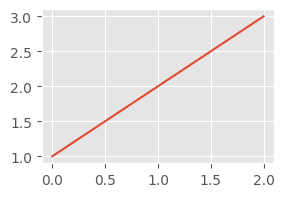

In [3]:
plt.style.use("ggplot")
pd.Series([1,2,3]).plot(figsize=(3,2))

## Scrape advertisement sales data from Git

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')

## Install additional library

In [5]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 10.6 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/11.1 MB 11.0 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.1 MB 11.2 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.1 MB 7.0 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 8.0 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 8.6 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   -- ------------------------------------- 2.4/43.6 MB 11.5 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/43.6 M

## Check obtained dataframe

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Understanding the Data

* Advertising cost for TV, Radio, and Newspaper are in thousands.
* Number of sales are in thousands.

### Sales Visualization Based on Advertising Cost Across Different Platforms.

#### scatterplot

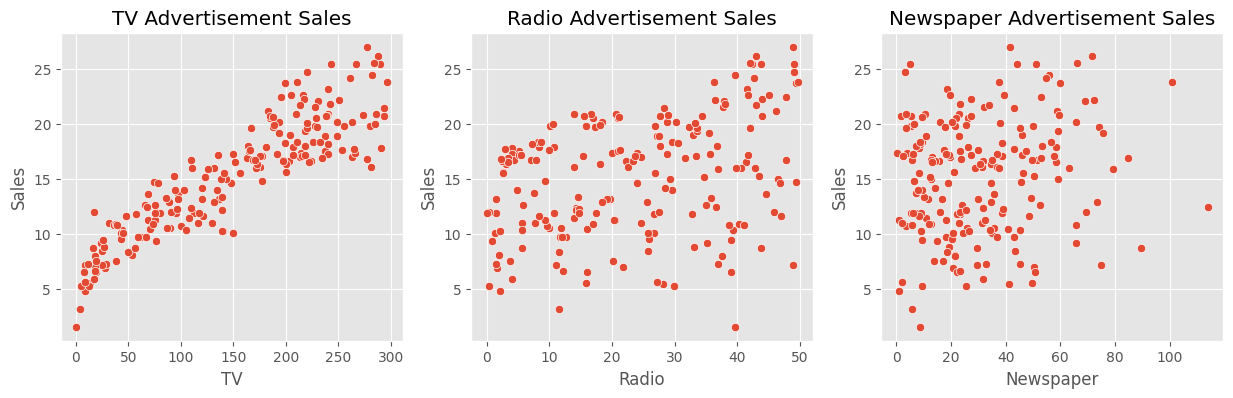

In [15]:
plt.figure(figsize=(15, 4))

# Platform: TV
plt.subplot(1, 3, 1)    # First ploft of a grid with 1 row, 3 columns
sns.scatterplot(data = df, x = "TV", y = "Sales")
plt.title("TV Advertisement Sales")

# Platform: Radio
plt.subplot(1, 3, 2)    # Second ploft of a grid with 1 row, 3 columns
sns.scatterplot(data = df, x = "Radio", y = "Sales")
plt.title("Radio Advertisement Sales")

# Platform: Newspaper
plt.subplot(1, 3, 3)    # Third ploft of a grid with 1 row, 3 columns
sns.scatterplot(data = df, x = "Newspaper", y = "Sales")
plt.title("Newspaper Advertisement Sales")

plt.show()

#### regplot

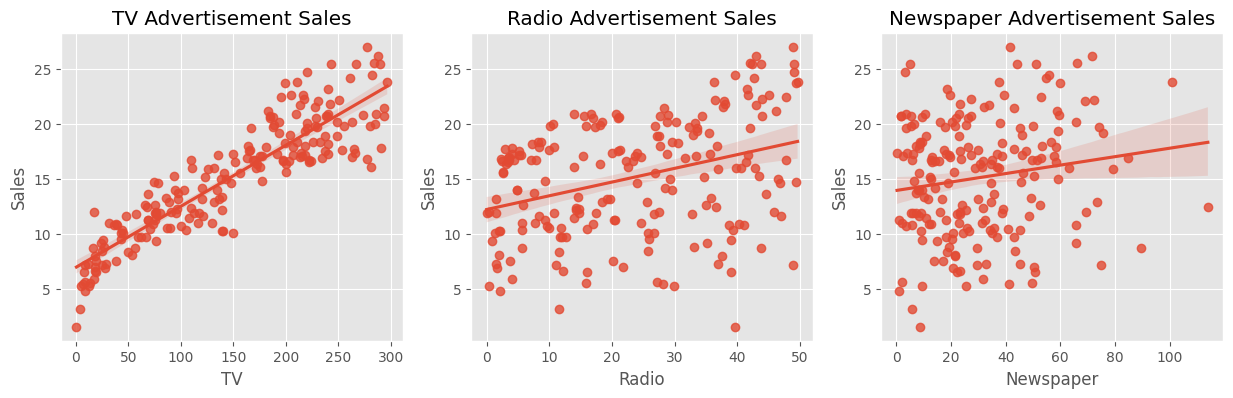

In [16]:
plt.figure(figsize=(15, 4))

# Platform: TV
plt.subplot(1, 3, 1)    # First ploft of a grid with 1 row, 3 columns
sns.regplot(data = df, x = "TV", y = "Sales")
plt.title("TV Advertisement Sales")

# Platform: Radio
plt.subplot(1, 3, 2)    # Second ploft of a grid with 1 row, 3 columns
sns.regplot(data = df, x = "Radio", y = "Sales")
plt.title("Radio Advertisement Sales")

# Platform: Newspaper
plt.subplot(1, 3, 3)    # Third ploft of a grid with 1 row, 3 columns
sns.regplot(data = df, x = "Newspaper", y = "Sales")
plt.title("Newspaper Advertisement Sales")

plt.show()

### Correlation Coefficient

In [18]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


* TV shows the strongest sales correlation while Newspaper shows the weakest correlation.

<Axes: >

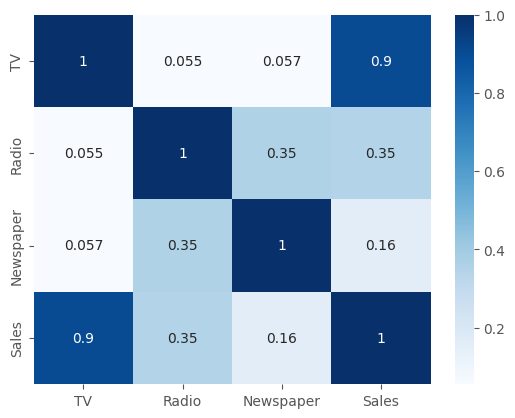

In [20]:
# Correlation Coefficient Heatmap
sns.heatmap(df.corr(), cmap = "Blues", annot = True)